---
<p align="left">
  <big>
    <b>
      <pre>
Júlia Aparecida Sousa de Oliveira    - RA: 769707 
Igor Teixeira Machado                - RA: 769708
Rafael Vinicius Polato Passador      - RA: 790036 
      </pre>
      <br>
      Disciplina: Aprendizado de Máquina 2
      <br>
      Professor: Prof. Dr. Diego Furtado Silva
      <br>
    </b>
  </big>
</p>


---

<h1 align="center"><b><big>Projeto de Implementação 02- Deep Learning vs Feature Engeeniring </big></b></h1>




#**1. Introdução**

<br>

Neste documento será apresentado o código utilizado para implementação do trabalho proposto. A partir da utilização de dados estruturados será realizada a comparação entre a potência de métodos divergentes, sendo eles: um baseado em arquiteturas de redes neurais profundas (BERT) e outra baseada na classificação a partir da extração de características com métodos tradicionais supervisionados (Naive-Bayes e SVM).

Dessa forma, para realização desta tarefa, escolheu-se o dataset baseando em fake-news oriundo do Kaggle, https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset, explorado nas subsequentes. 

Assim sendo, serão apresentados os códigos, bem como as descrições das funções e resultados obtidos. Ademais, apresentam-se, também, as interpretações e documentações do problema. 

Link para o Github: https://github.com/RafaelPassador/Trab2-Am2

Link para apresentação: inserir

Para resolução dessa problemática, selecionamos dois algoritimos baseados em redes neurais, BERT e RoBERTa, e, para comparação, dois algoritimos tradicionais de classificação, Naive-Bayes e Support Vector Machine (SVM). Assim, combinando-os com técnicas de processamento de linguagem natural, testamos a eficácia deles na tarefa de classificação de notícias como "fake-news" e notícias verdadeiras.


## **Instalando bibliotecas necessárias**




In [ ]:
!pip install torch torchvision
!pip install transformers==2.2.0
!pip install seqeval
!pip install tensorboardx
!pip install simpletransformers==0.9.1

In [ ]:
!pip install pyyaml==5.4.1

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import re
from sklearn.model_selection import train_test_split

import numpy as np

import gc
import requests
import os

from tqdm.notebook import trange
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from simpletransformers.classification import ClassificationModel
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
import string

In [ ]:
import plotly.express as px


/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


#**2. Análise Exploratória dos Dados**

## **Importando o dataset**

In [ ]:
df_true = pd.read_csv("True.csv", encoding='utf-8')
df_fake = pd.read_csv("Fake.csv", encoding='utf-8')


In [ ]:
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


## **Transformando os *targets* em valores binários**

In [ ]:
df_fake["output"] = 0
df_true["output"] = 1

## Combinando os datasets "Fake" e "True" em um único conjunto

In [ ]:
df = df_fake.append(df_true).sample(frac=1).reset_index(drop=True)

print("Número de exemplos: {} \n".format(df.shape[0]))
print("Número de colunas: {} \n".format(df.shape[1]))

df.head()

Número de exemplos: 44898 

Número de colunas: 5 



,title,text,subject,date,output
0,Senator presses U.S. derivatives regulator ove...,WASHINGTON (Reuters) - Senate Agriculture Comm...,politicsNews,"February 4, 2016",1
1,"The Last Time This Happened, It Signaled The ...",The last time this trade measure fell dramatic...,News,"January 23, 2016",0
2,Senate passes $602 billion defense authorizati...,WASHINGTON (Reuters) - The U.S. Senate voted o...,politicsNews,"June 14, 2016",1
3,ACLU threatens Cleveland over delays in conven...,(Reuters) - The American Civil Liberties Union...,politicsNews,"May 19, 2016",1
4,Vice President Biden chides Turkey over freedo...,ISTANBUL (Reuters) - U.S. Vice President Joe B...,politicsNews,"January 22, 2016",1


## **Gráficos de Balanceamento**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   output   44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [ ]:
sub_tf_df=df.groupby('output').apply(lambda x:x['title'].count()).reset_index(name='Counts')
sub_tf_df.output.replace({0:'False',1:'True'},inplace=True)
fig = px.bar(sub_tf_df, x="output", y="Counts",
             color='Counts', barmode='group',
             height=400, title='Balanceamento do Dataset')
fig.show()

In [ ]:
sub_check=df.groupby('subject').apply(lambda x:x['title'].count()).reset_index(name='Counts')
fig=px.bar(sub_check,x='subject',y='Counts',color='Counts',title='Número de Instâncias por Assuntos')
fig.show()

# **3. Pré-Processamento textual**

## **Checando e removendo possíveis duplicatas**

In [ ]:
missing_values_count = df.isnull().sum()
print("Número de dados faltantes por coluna:\n")
print (missing_values_count)

df.dropna(inplace=True)

Número de dados faltantes por coluna:

title      0
text       0
subject    0
date       0
output     0
dtype: int64


In [ ]:
df["is_duplicate"] = df.duplicated()
df[df["is_duplicate"]==True].count() 

title           209
text            209
subject         209
date            209
output          209
is_duplicate    209
dtype: int64

In [ ]:
df.drop_duplicates(keep=False, inplace=True, ignore_index=True)
df.drop("is_duplicate", axis=1, inplace=True) 
print("Número de exemplos depois de tiramos as duplicatas: {} \n".format(df.shape[0]))

Número de exemplos depois de tiramos as duplicatas: 44881 



In [ ]:
df_text = df[~df['text'].isna()][['text','output']]

In [ ]:
for item in df_text['text']:
  item = re.sub("[^a-zA-Z]", " ", item)

#**4. Construção e treinamento do modelo computacional**

## **Modelos baseados em redes neurais: "BERT" e "RoBERTa"**

O modelo BERT consiste em um algoritimos baseado em redes neurais para processamento de linguagem natural, mais especificamente em MLM (Masked Language Model) e, também, classificação.

Redes neurais são sistemas computacionais baseados na aproximação à computação baseada em ligações. A inspiração original para esta técnica advém do exame das estruturas paralelas do cérebro, em particular do exame de neurônios.

O MLM consiste em mascarar tokens aleatoriamente e, assim, o modelo neural a ser treinado objetiva predizer tal token na sentença




In [ ]:
train_df_text, eval_df_text = train_test_split(df_text, test_size = 0.25)

In [ ]:
train_df_text

,text,output
44793,President Barack Obama has called the fight ag...,0
39218,Minnesota the hotbed of liberalism and divers...,0
15320,Our good friend Joe Dan Gorman has done it aga...,0
28244,"MARRAKESH, Morocco (Reuters) - U.S. President-...",1
15691,A teen opened fire at an elementary school in ...,0
...,...,...
3075,The Republican Party has been a thorn in the s...,0
13367,ISTANBUL (Reuters) - A Turkish military vehicl...,1
40421,(Reuters) - A Turkish-Iranian gold trader on T...,1
39394,WASHINGTON (Reuters) - Concerns about coordina...,1


In [ ]:
eval_df_text

,text,output
16803,BEIRUT (Reuters) - The Syrian government is op...,1
26434,WASHINGTON (Reuters) - U.S. President Donald T...,1
3853,"SAN JUAN, Puerto Rico (Reuters) - U.S. Preside...",1
20150,WASHINGTON (Reuters) - U.S. Republicans in Was...,1
40306,"WASHINGTON (Reuters) - Steny Hoyer, the No. 2 ...",1
...,...,...
23465,,0
30160,MEXICO CITY (Reuters) - Hurricane Irma s deadl...,1
36589,The insanity continues! The outrageous invasio...,0
28445,Not that the word legal means anything to ei...,0


In [ ]:
model = ClassificationModel('bert', 'bert-base-cased', num_labels=2, args={'output_dir': 'outputs/',
   'cache_dir': 'cache/',

   'fp16': False,
   'fp16_opt_level': 'O1',
   'max_seq_length': 128,
   'train_batch_size': 8,
   'eval_batch_size': 8,
   'gradient_accumulation_steps': 1,
   'num_train_epochs': 3,
   'weight_decay': 0,
   'learning_rate': 4e-5,
   'adam_epsilon': 1e-8,
   'warmup_ratio': 0.06,
   'warmup_steps': 0,
   'max_grad_norm': 1.0,

   'logging_steps': 50,
   'evaluate_during_training': False,
   'save_steps': 2000,
   'eval_all_checkpoints': True,
   'use_tensorboard': True,

   'overwrite_output_dir': True,
   'reprocess_input_data': True,})

100%|██████████| 435779157/435779157 [00:10<00:00, 42429856.51B/s]


In [ ]:
model.train_model(train_df_text)

Converting to features started.


  0%|          | 0/33660 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Current iteration:   0%|          | 0/4208 [00:00<?, ?it/s]

Running loss: 0.765729

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:146: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:1055.)
  exp_avg.mul_(beta1).add_(1.0 - beta1, grad)


Running loss: 0.520280

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:249: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.000048

Current iteration:   0%|          | 0/4208 [00:00<?, ?it/s]

Running loss: 0.000004

Current iteration:   0%|          | 0/4208 [00:00<?, ?it/s]

Running loss: 0.000012Training of bert model complete. Saved to outputs/.


In [ ]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df_text)

Converting to features started.


  0%|          | 0/11221 [00:00<?, ?it/s]

  0%|          | 0/1403 [00:00<?, ?it/s]

In [ ]:
print(result)
print(model_outputs)

{'mcc': 1.0, 'tp': 5368, 'tn': 5853, 'fp': 0, 'fn': 0, 'eval_loss': 1.1000212819836852e-05}
[[ 5.9406977 -5.7368   ]
 [ 5.9131203 -5.724269 ]
 [ 5.9642878 -5.7420278]
 ...
 [-5.9911656  5.793462 ]
 [-5.993379   5.7957177]
 [ 5.684274  -5.447628 ]]


In [ ]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))

In [ ]:
true = eval_df_text['output'].tolist()
predicted = lst

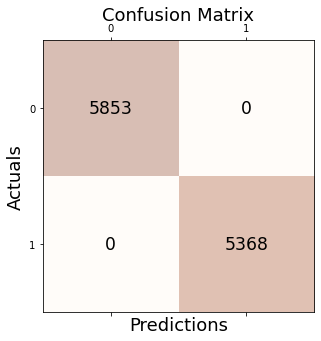

In [ ]:
mat = metrics.confusion_matrix(true , predicted)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(mat, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        ax.text(x=j, y=i,s=mat[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print(metrics.classification_report(true,predicted,target_names=['real','fake']))

              precision    recall  f1-score   support

        real       1.00      1.00      1.00      5853
        fake       1.00      1.00      1.00      5368

    accuracy                           1.00     11221
   macro avg       1.00      1.00      1.00     11221
weighted avg       1.00      1.00      1.00     11221



O modelo RoBERTa é um algoritmo derivado dos modelos BERT que possui como diferencial a execução da etapa de "Masking" durante o treinamento do modelo, modificando, também, os principais hiperparâmetros, removendo o objetivo de pré-treinamento da próxima frase e treinando com minilotes e taxas de aprendizado muito maiores.

In [ ]:
model2 = ClassificationModel('roberta', 'roberta-base', num_labels=2, args={'output_dir': 'outputs/',
   'cache_dir': 'cache/',

   'fp16': False,
   'fp16_opt_level': 'O1',
   'max_seq_length': 128,
   'train_batch_size': 8,
   'eval_batch_size': 8,
   'gradient_accumulation_steps': 1,
   'num_train_epochs': 3,
   'weight_decay': 0,
   'learning_rate': 4e-5,
   'adam_epsilon': 1e-8,
   'warmup_ratio': 0.06,
   'warmup_steps': 0,
   'max_grad_norm': 1.0,

   'logging_steps': 50,
   'evaluate_during_training': False,
   'save_steps': 2000,
   'eval_all_checkpoints': True,
   'use_tensorboard': True,

   'overwrite_output_dir': True,
   'reprocess_input_data': True,})

100%|██████████| 501200538/501200538 [00:14<00:00, 34587094.00B/s]


In [ ]:
model2.train_model(train_df_text)

Converting to features started.


  0%|          | 0/33660 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Current iteration:   0%|          | 0/4208 [00:00<?, ?it/s]

Running loss: 0.711078

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:146: UserWarning:

This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:1055.)



Running loss: 0.724241

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:249: UserWarning:

To get the last learning rate computed by the scheduler, please use `get_last_lr()`.



Running loss: 0.000005

Current iteration:   0%|          | 0/4208 [00:00<?, ?it/s]

Running loss: 0.000090

Current iteration:   0%|          | 0/4208 [00:00<?, ?it/s]

Running loss: 0.000053Training of roberta model complete. Saved to outputs/.


In [ ]:
result, model_outputs, wrong_predictions = model2.eval_model(eval_df_text)

Converting to features started.


  0%|          | 0/11221 [00:00<?, ?it/s]

  0%|          | 0/1403 [00:00<?, ?it/s]

In [ ]:
print(result)
print(model_outputs)

{'mcc': 0.9992860650861013, 'tp': 5400, 'tn': 5817, 'fp': 2, 'fn': 2, 'eval_loss': 0.0029762163670336303}
[[-5.445243   5.2546906]
 [-5.4452515  5.254702 ]
 [-5.4451513  5.2542386]
 ...
 [ 5.194502  -5.009427 ]
 [ 5.1968627 -5.0091014]
 [ 5.1952634 -5.0089817]]


In [ ]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))

In [ ]:
true = eval_df_text['output'].tolist()
predicted = lst

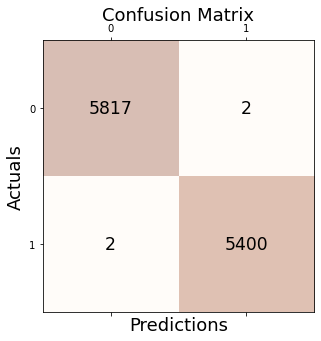

In [ ]:
mat = metrics.confusion_matrix(true , predicted)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(mat, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        ax.text(x=j, y=i,s=mat[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print(metrics.classification_report(true,predicted,target_names=['real','fake']))

              precision    recall  f1-score   support

        real       1.00      1.00      1.00      5819
        fake       1.00      1.00      1.00      5402

    accuracy                           1.00     11221
   macro avg       1.00      1.00      1.00     11221
weighted avg       1.00      1.00      1.00     11221



## **Modelos Baseados em Algorítmos de Classificação Tradicionais**

### **Processamento de Linguagem Natural**

In [ ]:
df_text

,text,output
0,NEW YORK (Reuters) - U.S. presidential candida...,1
1,,0
2,"WASHINGTON (Reuters) - With Stephen Bannon, th...",1
3,LONDON (Reuters) - Britain wants to reach agre...,1
4,Tucker Carlson had an intense debate with Clin...,0
...,...,...
44876,During a United Nations Summit in New York Cit...,0
44877,Liberals have been telling American citizens f...,0
44878,WASHINGTON (Reuters) - Republican U.S. lawmake...,1
44879,Donald Trump s days in the White House could b...,0


In [ ]:
X = df_text.drop(["output"],axis=1)
y = df_text["output"]

In [ ]:
punct = string.punctuation

In [ ]:
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#### **"Stemmizando", colocando as palavras em letras minúsculas, removendo "stopwords" e sinais de pontuação**

Na "stemmização" vamos analisar cada palavra individualmente e reduzi-la à sua raiz ("stem" ou "radical"), retirando, assim, as flexões da palavra.

In [ ]:
ps = PorterStemmer()
corpus=[]
for i in range(0,len(X)):
    review = re.sub("[^a-zA-Z]"," ",X["text"][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words("english")]
    review = " ".join(review)
    for p in punct:
        review = review.replace(p, '')
    corpus.append(review)

In [ ]:
corpus

['new york reuter u presidenti candid ted cruz support among republican even nation level parti front runner donald trump accord reuter ipso poll u senat pick victori wisconsin primari cruz gain poll mark first time sinc novemb one trump rival threaten lead support among republican race parti nomine nov elect gain coincid bumpi patch trump forc backtrack last week say women abort face punish procedur outlaw voic support campaign manag charg misdemeanor assault allegedli grab report cruz senat texa got percent support trump percent poll republican taken april found number put two within poll percentag point credibl interv measur accuraci cruz trump also briefli even earli last week recent month ago senat marco rubio also still candid cruz trail trump reuter ipso poll point ohio governor john kasich candid left race republican parti nomin place third april poll percent trump support falter among women particular recent week percent like women voter said unfavor opinion trump accord roll 

### Bag-of-Words

Uma Bag-of-Words é uma representação de texto que descreve a ocorrência de palavras dentro de um documento, envolvendo duas características: um vocabulário de palavras conhecidas e uma medida da presença de palavras conhecidas.

In [ ]:
vectorizer = CountVectorizer()
bow_data = vectorizer.fit_transform(corpus)
bow_data

<44881x89633 sparse matrix of type '<class 'numpy.int64'>'
	with 6788992 stored elements in Compressed Sparse Row format>

A extração de features transforma dados brutos em recursos numéricos que podem ser processados, preservando as informações no conjunto de dados original.

In [ ]:
vectorizer = CountVectorizer(max_features=5000)
bow_data = vectorizer.fit_transform(corpus).toarray()
features = vectorizer.get_feature_names_out()
bow_data = pd.DataFrame(bow_data, columns=features)

In [ ]:
bow_data

,aaron,abadi,abandon,abba,abbott,abc,abdel,abdullah,abe,abedin,...,zarrab,zealand,zero,zika,zimbabw,zink,zone,zor,zuckerberg,zuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44876,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
features

array(['aaron', 'abadi', 'abandon', ..., 'zor', 'zuckerberg', 'zuma'],
      dtype=object)

Separando o dataset em porções de treino e teste.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(bow_data, y, test_size=0.30, random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
classifier=MultinomialNB()

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)

accuracy = metrics.accuracy_score(y_test, pred)

In [ ]:
print(accuracy)

0.9458596360935759


In [ ]:
f1_score = metrics.f1_score(y_test, pred)
print(f1_score)

0.9439618725497733


In [ ]:
recall_score = metrics.recall_score(y_test, pred)
print(recall_score)

0.9421512966088691


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



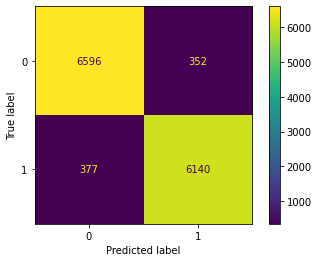

In [ ]:
cm = metrics.confusion_matrix(y_test, pred)
metrics.plot_confusion_matrix(classifier,X_test,y_test)

In [ ]:
from sklearn.svm import LinearSVC

model_svc = LinearSVC(dual=False).fit(X_train, y_train)
y_pred = model_svc.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)

In [ ]:
print(accuracy)

0.9929446713702191


In [ ]:
f1_score = metrics.f1_score(y_test, y_pred)
print(f1_score)

0.9927040933876046


In [ ]:
recall_score = metrics.recall_score(y_test, y_pred)
print(recall_score)

0.9917139788246125


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



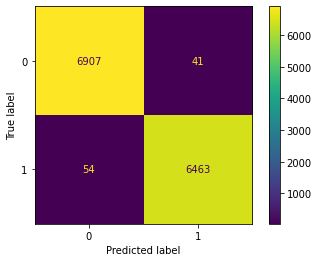

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
metrics.plot_confusion_matrix(model_svc,X_test,y_test)

### TF-IDF

Term Frequency–Inverse Document Frequency (TF-IDF) é um método estatístico que visa calcular quais termos são mais relevantes em um determinado córpus.

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
tfidf_data = vectorizer.fit_transform(corpus).toarray()
features = vectorizer.get_feature_names_out()
tfidf_data = pd.DataFrame(tfidf_data, columns=features)

Extraindo as features e transformando-as em recursos numéricos.

In [ ]:
tfidf_data

,aaron,abadi,abandon,abba,abbott,abc,abdel,abdullah,abe,abedin,...,zarrab,zealand,zero,zika,zimbabw,zink,zone,zor,zuckerberg,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44877,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Separando o dataset em treino e teste.

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(tfidf_data, y, test_size=0.30, random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

classifier2 = MultinomialNB()

classifier2.fit(X_train2, y_train2)
pred2 = classifier2.predict(X_test2)

accuracy2 = metrics.accuracy_score(y_test2, pred2)

In [ ]:
print(accuracy2)

0.9304121797252135


In [ ]:
f1_score2 = metrics.f1_score(y_test2, pred2)
print(f1_score2)

0.9275272642895814


In [ ]:
recall_score2 = metrics.recall_score(y_test2, pred2)
print(recall_score2)

0.9200552401411692


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



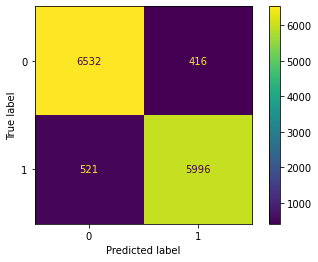

In [ ]:
cm = metrics.confusion_matrix(y_test2, pred2)
metrics.plot_confusion_matrix(classifier2,X_test2,y_test2)

In [ ]:
from sklearn.svm import LinearSVC

model_svc2 = LinearSVC(dual=False).fit(X_train2, y_train2)
y_pred2 = model_svc2.predict(X_test2)

accuracy2 = metrics.accuracy_score(y_test2, y_pred2)

In [ ]:
print(accuracy2)

0.9925733382844412


In [ ]:
f1_score2 = metrics.f1_score(y_test2, y_pred2)
print(f1_score2)

0.9923383389518847


In [ ]:
recall_score2 = metrics.recall_score(y_test2, y_pred2)
print(recall_score2)

0.9937087617001688


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



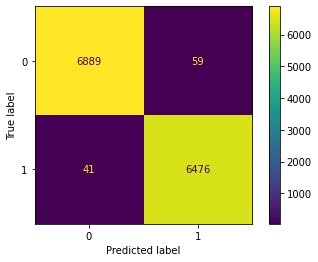

In [ ]:
cm = metrics.confusion_matrix(y_test2, y_pred2)
metrics.plot_confusion_matrix(model_svc2,X_test2,y_test2)

# **5. Resultados**
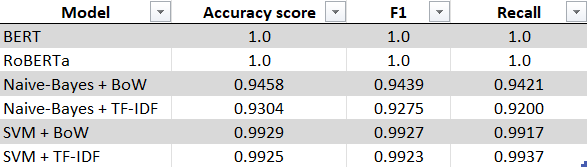